# Recycle Project

## Classification of Recycled Materials (Plastic vs Glass)

Why Recycling?

환경 보전, 국제 사회의 최대 공동 목표이자 숙제이다. UN에서는 ‘환경을 보전하며 지속 가능한 소비와 생산이 가능하도록’하자는 목표를 2021년도 SDGs (지속가능 개발 목표)로 발표 하였다. 이처럼 우리는, 소비자와 생산자의 입장에서 환경 보전과 자원 절약의 중요성을 끊임 없이 고민하고 행동해야 한다.
하지만 환경 보전의 중요성이 익히 알려져 있음에도, 현재는 쓰레기 배출 조차 잘 이루어지고 있지 않고 있다. 함부로 버려지는 쓰레기로 인하여, 배출된 쓰레기는 분리수거장에서 일일이 손으로 분리 작업하는 2차 수고까지 겪고 있다.
이러한 문제에 착안하여 환경 문제 개선 및 사용자들의 행동 유발을 일으키고자 인공지능 분리수거기를 착안하게 되었다. 해당 기기는 CNN 머신 러닝 기법으로 학습시켜, 가정에서 배출되는 쓰레기를 해당 기기에 투입할 시, 재질을 인식하고 분류하여 줄 것이다. 고철의 경우, 금속 탐기지로 인식이 가능하기에, 플라스틱과 유리를 분류해주는 분류기를 제공하고자 한다. 쓰레기를 배출하는 과정에서 올바른 분리를 도움으로 2차 분리 수거의 수고를 덜하여, 시간과 에너지, 그리고 비용까지 절약되는 효과를 기대한다. 

 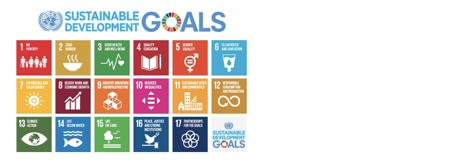

### 0. Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import### 0. Imports cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.image as implt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')
import os

Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')
Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')
Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 4 ('backend: TkAgg')
Duplicate key in file '/Users/yeeerin/.matplotlib/matplotlibrc', line 5 ('backend: TkAgg')


### 1.0 Data path

In [112]:
BASE_PATH = "/Users/yeeerin/Documents/HY/'21_G4/01_AI/recycle_pjt/data/images"
train_data = BASE_PATH + "/train"
test_data = BASE_PATH + "/test"

train_plastic_path = BASE_PATH + "/train/plastic"
train_glass_path = BASE_PATH + "/train/glass"

test_plastic_path = BASE_PATH + "/test/plastic"
test_glass_path = BASE_PATH + "/test/glass"

### 1.1 Vizualizing the data

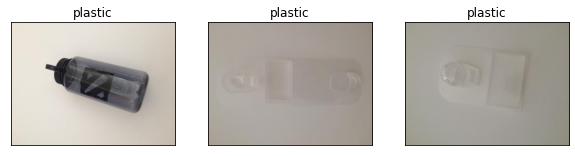

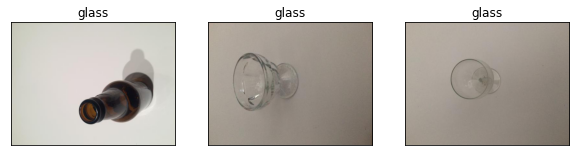

In [9]:
plt.figure(figsize=(10,10))
for i in range(3):
    plastic_img = implt.imread(train_plastic_path + "/"+str(i)+".jpg") #plastic
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title('plastic')
    plt.imshow(plastic_img)
plt.show()

plt.figure(figsize=(10,10))
for i in range(3):
    glass_img = implt.imread(train_glass_path + "/"+str(i)+".jpg") #glass
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title('glass')
    plt.imshow(glass_img, cmap = plt.cm.gray)
plt.show()

### 1.2.1 Train Images load

In [11]:
img_size = 224
plastic_train = []
glass_train = []
label_train = []


for i in os.listdir(train_plastic_path): # all train plastic images
    if os.path.isfile(train_data + "/plastic/" + i): # check image in file
        plastic = Image.open(train_data + "/plastic/" + i) 
        plastic = plastic.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 224,224
        plastic = np.asarray(plastic)/255 # bit format
        plastic_train.append(plastic)
        label_train.append(1)
        
for i in os.listdir(train_glass_path): # all train glass images
    if os.path.isfile(train_data + "/glass/" + i): # check image in file
        glass = Image.open(train_data + "/glass/" + i)  
        glass = glass.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 224,224
        glass = np.asarray(glass)/255 # bit format
        glass_train.append(glass)
        label_train.append(0)

In [13]:
x_train = np.concatenate((plastic_train,glass_train),axis=0)
print("plastic:",np.shape(plastic_train) , "glass:",np.shape(glass_train))
x_train = x_train.reshape(-1,img_size,img_size,3)
x_train_label = np.asarray(label_train)
x_train_label = x_train_label.reshape(x_train_label.shape[0],1)

print("train_dataset:",np.shape(x_train), "train_values:",np.shape(x_train_label))

plastic: (925, 224, 224, 3) glass: (925, 224, 224, 3)
train_dataset: (1850, 224, 224, 3) train_values: (1850, 1)


### 1.2.2 Test Images load

In [14]:
plastic_test = []
glass_test = []
label = []

for i in os.listdir(test_plastic_path): # all train plastic images
    if os.path.isfile(test_data + "/plastic/" + i): # check image in file
        plastic = Image.open(test_data + "/plastic/" + i)
        plastic = plastic.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        plastic = np.asarray(plastic)/255 # bit format
        plastic_test.append(plastic)
        label.append(1)
        
for i in os.listdir(test_glass_path): # all train glass images
    if os.path.isfile(test_data + "/glass/" + i): # check image in file
        glass = Image.open(test_data + "/glass/" + i)
        glass = glass.resize((img_size,img_size), Image.ANTIALIAS) # resizing to 50,50
        glass = np.asarray(glass)/255 # bit format
        glass_test.append(glass)
        label.append(0)

In [15]:
x_test = np.concatenate((plastic_test,glass_test),axis=0)
print("plastic:",np.shape(plastic_test) , "glass:",np.shape(glass_test))
x_test = x_test.reshape(-1,img_size,img_size,3)
x_test_label = np.asarray(label)
x_test_label = x_test_label.reshape(x_test_label.shape[0],1)
print("train_dataset:",np.shape(x_test), "train_values:",np.shape(x_test_label))

plastic: (96, 224, 224, 3) glass: (96, 224, 224, 3)
train_dataset: (192, 224, 224, 3) train_values: (192, 1)


### 1.2.3 Concatenate Train image + Test image

In [16]:
x = np.concatenate((x_train,x_test),axis=0) #train data
y = np.concatenate((x_train_label,x_test_label),axis=0)
print("images:",np.shape(x), "labels:",np.shape(y))

images: (2042, 224, 224, 3) labels: (2042, 1)


### 1.2.4 Spliting Concatenated dataset

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print("Train Number: ", number_of_train)
print("Test Number: ", number_of_test)

Train Number:  1735
Test Number:  307


In [18]:
x_train = X_train
x_test = X_test
y_train = y_train
y_test = y_test
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (1735, 224, 224, 3)
x test:  (307, 224, 224, 3)
y train:  (1735, 1)
y test:  (307, 1)


## 2. 1차 Machine Learing

### 2.1 1차 CNN Model (꽃 분류기 과제 모델)

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [20]:
num_classes = 2

#모델 구성하기
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
#모델 컴파일
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_22 (ModuleWra (None, 1)                 0         
_________________________________________________________________
module_wrapper_23 (ModuleWra multiple                  1792      
_________________________________________________________________
module_wrapper_24 (ModuleWra multiple                  0 (unused)
_________________________________________________________________
module_wrapper_25 (ModuleWra multiple                  0 (unused)
_________________________________________________________________
module_wrapper_26 (ModuleWra multiple                  0 (unused)
_________________________________________________________________
module_wrapper_27 (ModuleWra multiple                  0 (unused)
_________________________________________________________________
module_wrapper_28 (ModuleWra multiple                 

In [23]:
#모델 학습
epochs=20
history = model.fit(
  x_train, y_train,
  batch_size =20, 
  epochs=epochs, validation_split = 0.1
)

Epoch 1/20
79/79 [==============================] - 57s 700ms/step - loss: 0.6942 - accuracy: 0.5048 - val_loss: 0.6933 - val_accuracy: 0.4943
Epoch 2/20
79/79 [==============================] - 52s 659ms/step - loss: 0.6934 - accuracy: 0.4856 - val_loss: 0.6934 - val_accuracy: 0.4943
Epoch 3/20
79/79 [==============================] - 44s 554ms/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.4943
Epoch 4/20
79/79 [==============================] - 50s 641ms/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.4943
Epoch 5/20
79/79 [==============================] - 41s 523ms/step - loss: 0.6933 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.4943
Epoch 6/20
79/79 [==============================] - 40s 509ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4943
Epoch 7/20
79/79 [==============================] - 69s 870ms/step - loss: 0.6933 - accuracy: 0.4926 - val_loss: 0.6931 - val_accuracy: 0.5057

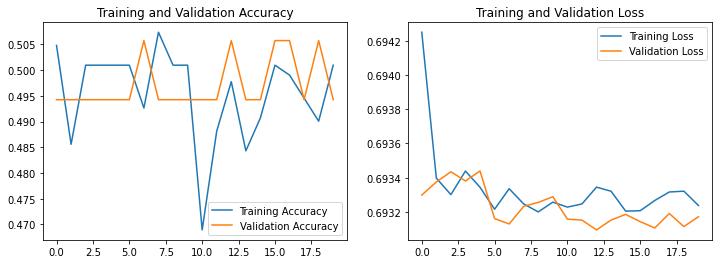

In [24]:
#모델 학습 과정 정확도/loss 추이

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right') #middle right
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 2.2 2차 CNN Model (1차 모델을 기준으로 데이터 증강하여)

#### 2.2.1 데이터 증강

In [25]:
def load_img(path):
    image = cv2.resize(path, (224, 224))
    return image[...,::-1]

def prepare(image):
    IMG_SIZE = 224
    new_array = cv2.resize(image, (img_size, img_size)) 
    return new_array.reshape(-1, img_size,img_size,3)

In [26]:
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_size, 
                                                              img_size,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

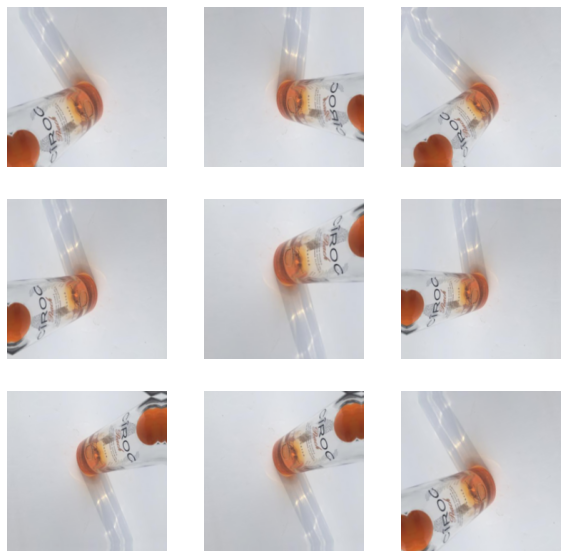

In [27]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(prepare(x_train[0]))
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

#### 2.2.2 증강된 데이터로 재학습

In [117]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_size, img_size, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

AttributeError: module 'keras.layers' has no attribute 'experimental'

In [29]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_22 (ModuleWra (None, 1)                 0         
_________________________________________________________________
module_wrapper_23 (ModuleWra multiple                  1792      
_________________________________________________________________
module_wrapper_24 (ModuleWra multiple                  0 (unused)
_________________________________________________________________
module_wrapper_25 (ModuleWra multiple                  0 (unused)
_________________________________________________________________
module_wrapper_26 (ModuleWra multiple                  0 (unused)
_________________________________________________________________
module_wrapper_27 (ModuleWra multiple                  0 (unused)
_________________________________________________________________
module_wrapper_28 (ModuleWra multiple                 

In [116]:
epochs=20
history = model.fit(
  x_train, y_train,
  batch_size =20, 
  epochs=epochs, validation_split = 0.1
)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

ValueError: x and y must have same first dimension, but have shapes (10,) and (20,)

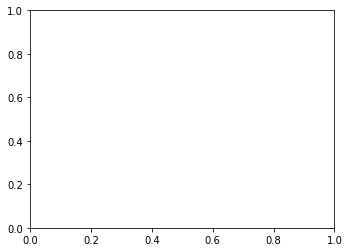

In [115]:
#모델 학습 과정 정확도/loss 추이
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right') #middle right
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
# predictions
predictions = model.predict(x_test)

In [33]:
rounded_predictions = model.predict_classes(x = x_test, batch_size=10, verbose=0)
for i in rounded_predictions[:20]:
    print(i)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


## 3. 2차 Machine Learing

### 3.1 VGG16을 활용하여 정확도 높히기

In [38]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.models import Model

[VGG16]
VGG16 was publised in 2014 and is one of the simplest (among the other cnn architectures used in Imagenet competition). It's Key Characteristics are:

This network contains total 16 layers in which weights and bias parameters are learnt.
A total of 13 convolutional layers are stacked one after the other and 3 dense layers for classification.
The number of filters in the convolution layers follow an increasing pattern (similar to decoder architecture of autoencoder).
The informative features are obtained by max pooling layers applied at different steps in the architecture.
The dense layers comprises of 4096, 4096, and 1000 nodes each.
The cons of this architecture are that it is slow to train and produces the model with very large size.
The VGG16 architecture is given below:
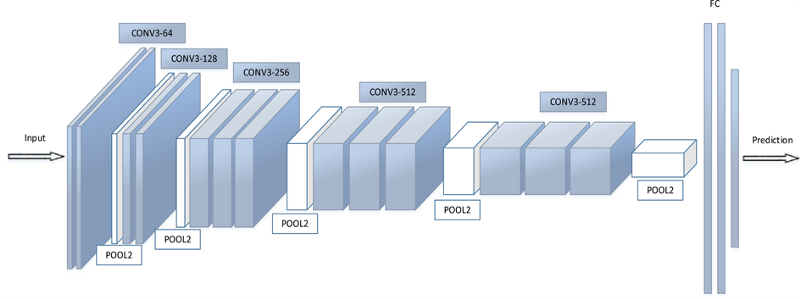

### 3.1.1 VGG16 model (Functional)

In [131]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((224,224,3)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

vgg16_model.summary()

In [132]:
type(vgg16_model)

keras.engine.functional.Functional

### 3.1.2 VGG16 model (Sequential)

In [133]:
vgg16_model = keras.applications.vgg16.VGG16()

In [134]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [149]:
from keras.models import Sequential

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [150]:
for layer in model.layers:
    layer.trainable = False

In [151]:
model.add(Dense(2, activation='softmax'))

In [152]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [135]:
vgg16_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
hist = vgg16_model.fit(x_train,y_train,
                 batch_size=20,
                 epochs = 10,
                 validation_split=0.1,
                shuffle=True,callbacks=[learning_rate_reduction,custom_early_stopping])

Epoch 1/10
79/79 [==============================] - 1476s 19s/step - loss: 0.7277 - accuracy: 0.5067 - val_loss: 0.7615 - val_accuracy: 0.4943
Epoch 2/10
79/79 [==============================] - 1581s 20s/step - loss: 0.7080 - accuracy: 0.5202 - val_loss: 0.7053 - val_accuracy: 0.4943
Epoch 3/10
79/79 [==============================] - 1513s 19s/step - loss: 0.6977 - accuracy: 0.5131 - val_loss: 0.7015 - val_accuracy: 0.5057
Epoch 4/10
79/79 [==============================] - 1600s 20s/step - loss: 0.7079 - accuracy: 0.5151 - val_loss: 0.7384 - val_accuracy: 0.4943
Epoch 5/10
79/79 [==============================] - 1584s 20s/step - loss: 0.7151 - accuracy: 0.5086 - val_loss: 0.7038 - val_accuracy: 0.4943
Epoch 6/10
79/79 [==============================] - 1700s 22s/step - loss: 0.7034 - accuracy: 0.4907 - val_loss: 0.7760 - val_accuracy: 0.4943
Epoch 7/10
79/79 [==============================] - 1540s 19s/step - loss: 0.7135 - accuracy: 0.5215 - val_loss: 0.6891 - val_accuracy: 0.5632

In [110]:
### Jupyter-notebook Valid error 떠서..
import nbformat as nbf
from glob import glob

import uuid
def get_cell_id(id_length=8):
    return uuid.uuid4().hex[:id_length]

# your notebook name/keyword
nb_name = 'pjt_0623'
notebooks = list(filter(lambda x: nb_name in x, glob("./*.ipynb", recursive=True)))

# iterate over notebooks
for ipath in sorted(notebooks):
    # load notebook
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)
    
    cell_ids = []
    for cell in ntbk.cells:
        cell_ids.append(cell['id'])

    # reset cell ids if there are duplicates
    if not len(cell_ids) == len(set(cell_ids)): 
        for cell in ntbk.cells:
            cell['id'] = get_cell_id()

    nbf.write(ntbk, ipath)

### 3.1.3 모델 학습 과정 정확도/loss 추이

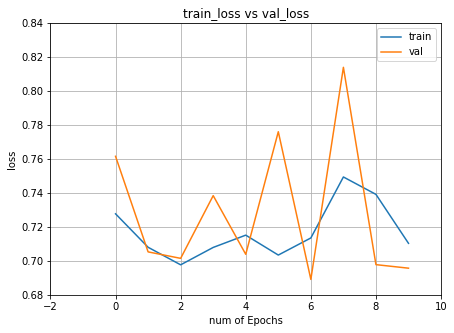

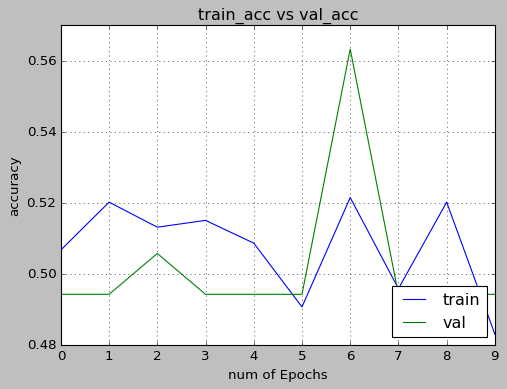

In [122]:
epochs = 10
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [136]:
val_loss, val_acc = vgg16_model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10/10 [==============================] - 69s 7s/step - loss: 7.6386 - accuracy: 0.0000e+00
7.63859224319458
0.0


### 3.1.4 예측 결과

In [138]:
predictions = vgg16_model.predict(x_test)
# predictions

In [140]:
rounded_prediction = model.predict_classes(x = x_test, batch_size=10, verbose=0)
for i in rounded_predictions[:10]:
    print(i)

TypeError: 'NoneType' object is not callable

In [ ]:
print(y_test[1:10])
print(np.unique(y_test, return_counts = True))

In [ ]:
rounded_prediction = np.array(rounded_prediction)
print(np.unique(rounded_prediction, return_counts = True))

In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [142]:
cm = confusion_matrix(y_test,rounded_predictions)

In [143]:
def plot_confusion_matrix(cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [144]:
cm = confusion_matrix(y_test,rounded_prediction)

cm_plot_labels = ['glass', 'plastic']
plot_confusion_matrix(cm=cm,
                      classes=cm_plot_labels,
                      title='Confusion Matrix')

NameError: name 'rounded_prediction' is not defined

Explanation of Matrix:

(True Positive)
Correct plastic Room Predictions: 18

(False Positive)
Incorrect plastic Room Predictions: 0

(True Negative)
Correct glass Room Predictions: 1

(False Negative)
Incorrect glass Room Predictions: 13

In [129]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test,
                               rounded_prediction,
                               target_names=['0','1'])

print(report)

NameError: name 'rounded_prediction' is not defined

### 4. 실험 결과

In [130]:
n = 3

prediction = model.predict(prepare(x_test[n]))
print("Probabilities: ",prediction)
x = ["plastic Room" if y_test[n]== 1 else "glass Room"]
print("Actual: ",x[0])
rounded_prediction = model.predict_classes(x = prepare(x_test[n]), batch_size=10, verbose=0)
y = ["plastic Room" if rounded_prediction[0]== 1 else "glass Room"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

TypeError: 'NoneType' object is not callable

In [ ]:
n = 10

prediction = model.predict(prepare(x_test[n]))
print("Probabilities: ",prediction)
x = ["plastic Room" if y_test[n]== 1 else "glass Room"]
print("Actual: ",x[0])
rounded_prediction = model.predict_classes(x = prepare(x_test[n]), batch_size=10, verbose=0)
y = ["plastic Room" if rounded_prediction[0]== 1 else "glass Room"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

In [ ]:
n = 16

prediction = model.predict(prepare(x_test[n]))
print("Probabilities: ",prediction)
x = ["plastic Room" if y_test[n]== 1 else "glass Room"]
print("Actual: ",x[0])
rounded_prediction = model.predict_classes(x = prepare(x_test[n]), batch_size=10, verbose=0)
y = ["plastic Room" if rounded_prediction[0]== 1 else "glass Room"]
print("Prediction: ", y[0])
plt.imshow(load_img(X_test[n]), cmap='gray')
plt.show()

다양한 국가의 사진을 학습시킴으로써, 전세계적으로 사용 가능한 분리수거기로 발전시키고자 한다. 천차만별의 다양한 형태의 쓰레기를 사진만으로 정확하게 인식시키기 위해서 학습 이미지의 규모를 증폭시키고자 한다.